In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
data = pd.read_csv(r"Dataset_Round_2.csv")

data["label"] = data["label"].replace("Null", "Bad")
# Display basic information about the dataset
print("Dataset Info:")

print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75687 entries, 0 to 75686
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   F1          75687 non-null  int64 
 1   F2          75687 non-null  int64 
 2   F3          75687 non-null  int64 
 3   F4          75687 non-null  int64 
 4   F5          75687 non-null  int64 
 5   Acc_Fin_x   75687 non-null  int64 
 6   Acc_Fin_y   75687 non-null  int64 
 7   Acc_Fin_z   75687 non-null  int64 
 8   Acc_Palm_x  75687 non-null  int64 
 9   Acc_Palm_y  75687 non-null  int64 
 10  Acc_Palm_z  75687 non-null  int64 
 11  Acc_Arm_x   75687 non-null  int64 
 12  Acc_Arm_y   75687 non-null  int64 
 13  Acc_Arm_z   75687 non-null  int64 
 14  label       75687 non-null  object
dtypes: int64(14), object(1)
memory usage: 8.7+ MB
None

First 5 rows of the dataset:
    F1   F2   F3   F4   F5  Acc_Fin_x  Acc_Fin_y  Acc_Fin_z  Acc_Palm_x  \
0  747  839  886  707  784       -11

In [9]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Missing values in the dataset:
F1            0
F2            0
F3            0
F4            0
F5            0
Acc_Fin_x     0
Acc_Fin_y     0
Acc_Fin_z     0
Acc_Palm_x    0
Acc_Palm_y    0
Acc_Palm_z    0
Acc_Arm_x     0
Acc_Arm_y     0
Acc_Arm_z     0
label         0
dtype: int64

Summary statistics for numerical columns:
                 F1            F2            F3            F4            F5  \
count  75687.000000  75687.000000  75687.000000  75687.000000  75687.000000   
mean     757.085603    847.012169    882.346427    753.237386    788.010715   
std       13.774589      8.188648     10.450047     62.203351      6.214043   
min      700.000000    805.000000    782.000000    646.000000    744.000000   
25%      748.000000    841.000000    877.000000    708.000000    785.000000   
50%      753.000000    846.000000    882.000000    717.000000    788.000000   
75%      764.000000    853.000000    887.000000    797.000000    791.000000   
max      827.000000    908.000000    936


Distribution of labels:
label
Bad        42917
Good       10930
Me          8230
Hungry      7930
Thirsty     5680
Name: count, dtype: int64


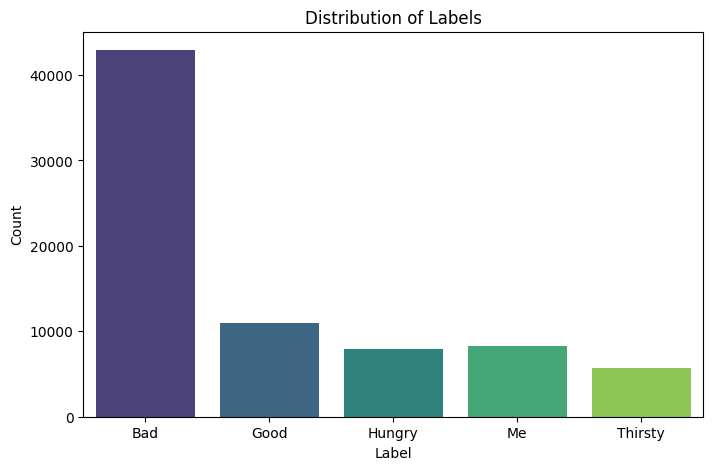

In [10]:
print("\nDistribution of labels:")
print(data['label'].value_counts())

# Visualize the distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

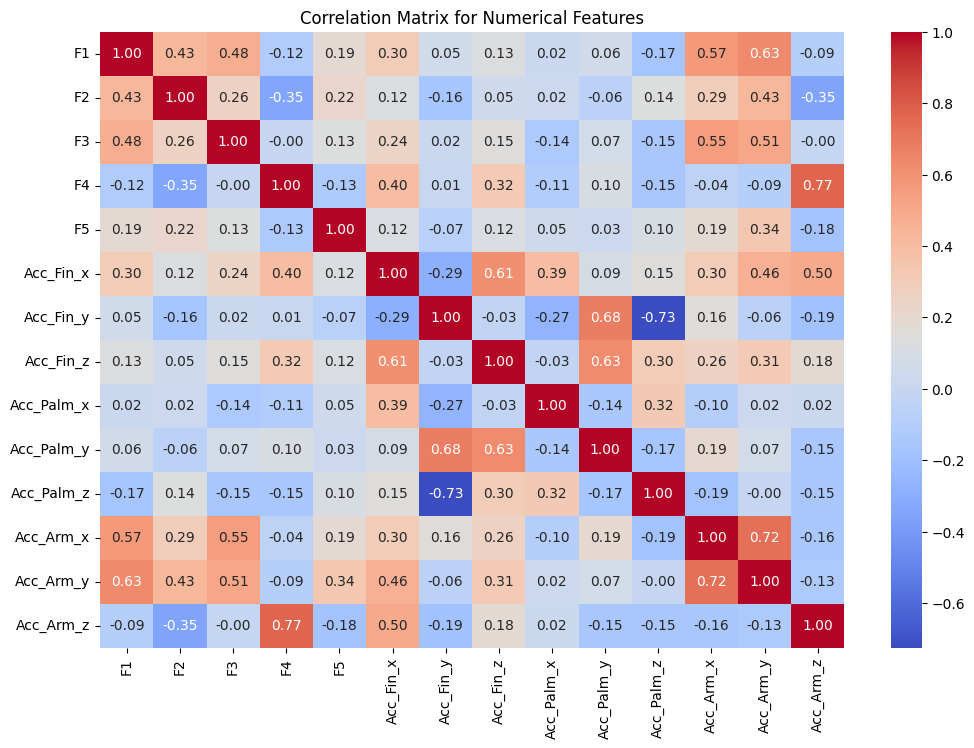

In [11]:
# Correlation matrix for numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Text(0.5, 1.0, 'Distribution of Acc_Fin_x')

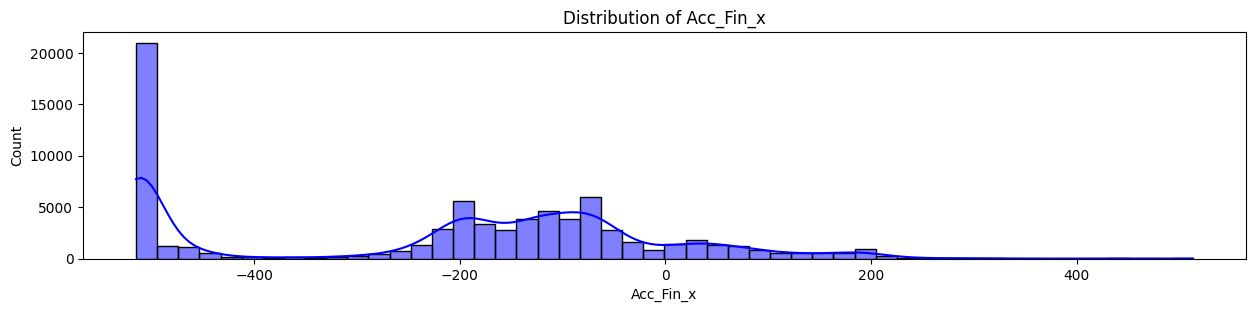

In [12]:

# Distribution of accelerometer data (Acc_Fin_x, Acc_Fin_y, Acc_Fin_z)
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.histplot(data['Acc_Fin_x'], kde=True, color='blue')
plt.title("Distribution of Acc_Fin_x")


Text(0.5, 1.0, 'Distribution of Acc_Fin_y')

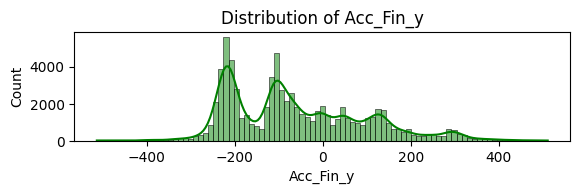

In [13]:

plt.subplot(3, 1, 2)
sns.histplot(data['Acc_Fin_y'], kde=True, color='green')
plt.title("Distribution of Acc_Fin_y")


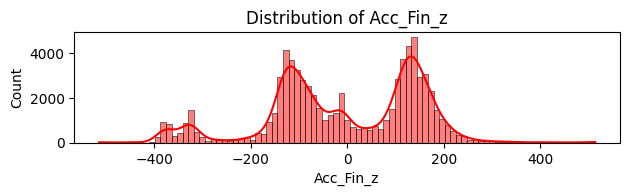

In [14]:
plt.subplot(3, 1, 3)
sns.histplot(data['Acc_Fin_z'], kde=True, color='red')
plt.title("Distribution of Acc_Fin_z")
plt.tight_layout()
plt.show()

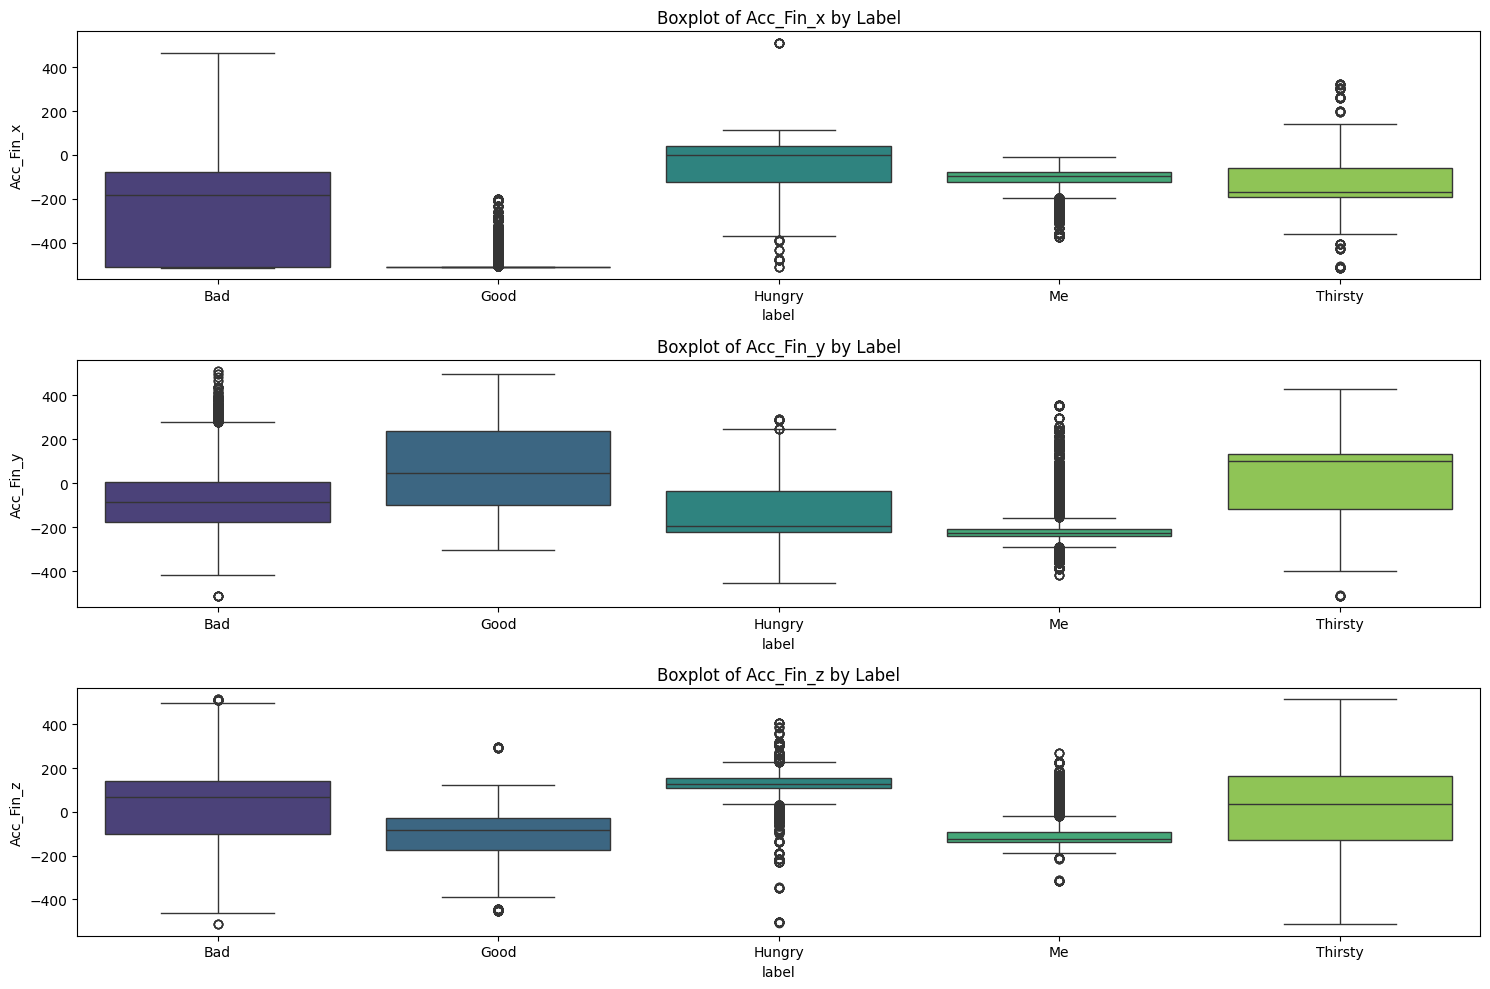

In [15]:
# Boxplots for accelerometer data
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='label', y='Acc_Fin_x', data=data, palette='viridis')
plt.title("Boxplot of Acc_Fin_x by Label")

plt.subplot(3, 1, 2)
sns.boxplot(x='label', y='Acc_Fin_y', data=data, palette='viridis')
plt.title("Boxplot of Acc_Fin_y by Label")

plt.subplot(3, 1, 3)
sns.boxplot(x='label', y='Acc_Fin_z', data=data, palette='viridis')
plt.title("Boxplot of Acc_Fin_z by Label")
plt.tight_layout()
plt.show()

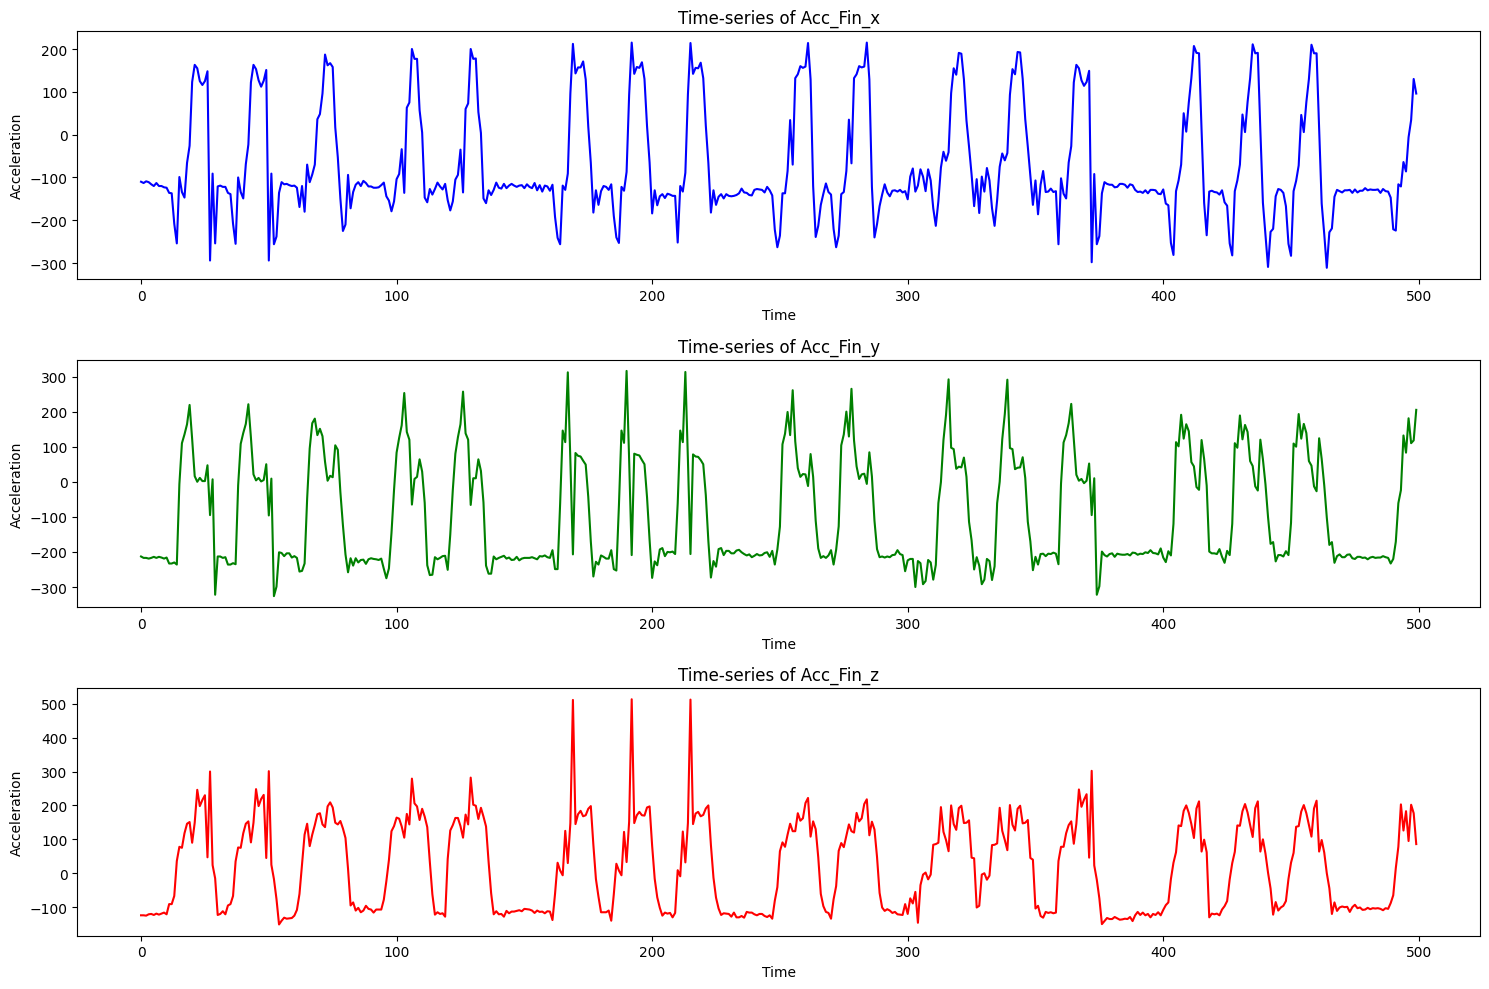

In [16]:
sample_data = data.iloc[:500]  # Use the first 500 rows for visualization
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(sample_data['Acc_Fin_x'], color='blue')
plt.title("Time-series of Acc_Fin_x")
plt.xlabel("Time")
plt.ylabel("Acceleration")

plt.subplot(3, 1, 2)
plt.plot(sample_data['Acc_Fin_y'], color='green')
plt.title("Time-series of Acc_Fin_y")
plt.xlabel("Time")
plt.ylabel("Acceleration")

plt.subplot(3, 1, 3)
plt.plot(sample_data['Acc_Fin_z'], color='red')
plt.title("Time-series of Acc_Fin_z")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.tight_layout()
plt.show()

In [ ]:
#Pairplot for accelerometer data (optional, can be slow for large datasets)
sns.pairplot(data[['Acc_Fin_x', 'Acc_Fin_y', 'Acc_Fin_z', 'label']], hue='label', palette='viridis')
plt.show()